<a href="https://colab.research.google.com/github/ShahKhalid1234/Cognifyz/blob/main/Task_GeospatialAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Data set
from google.colab import files
Dataset=files.upload()

Saving Dataset .csv to Dataset .csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Data
data = pd.read_csv('Dataset .csv')



In [ ]:
# Step 2: Extract Relevant Information
# Assuming your CSV has columns 'name', 'latitude', 'longitude', 'rating', 'city', and 'country'
restaurant_locations = data[['Restaurant Name', 'Latitude', 'Longitude', 'Aggregate rating', 'City']]

# Step 3: Visualize the Data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=restaurant_locations, x='Longitude', y='Latitude', palette='viridis', legend='full')
plt.title('Restaurant Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper left')
plt.show()




In [ ]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource

# Initialize the output to display in the notebook
output_notebook()

# Initialize the figure
p = figure(title="Restaurant Locations", x_axis_label='Longitude', y_axis_label='Latitude')

# Create a ColumnDataSource for restaurant locations
source = ColumnDataSource(data=dict(lat=restaurant_locations['Latitude'], lon=restaurant_locations['Longitude'], name=restaurant_locations['Restaurant Name']))

# Add markers for each restaurant location
p.circle('lon', 'lat', size=10, source=source, fill_color='blue', fill_alpha=0.6, legend_label='Restaurants')

# Show the map
show(p)



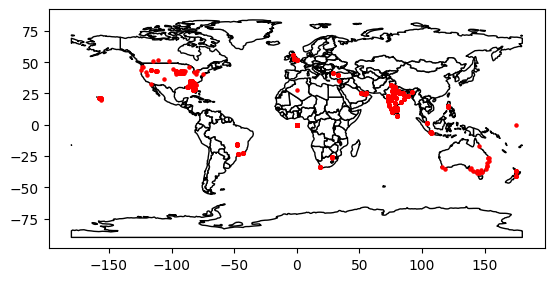

In [36]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

# Assuming you have the restaurant_locations DataFrame with columns 'Latitude', 'Longitude', and 'Restaurant Name'

# Convert latitude and longitude to a GeoDataFrame
geometry = [Point(lon, lat) for lon, lat in zip(restaurant_locations['Longitude'], restaurant_locations['Latitude'])]
gdf = gpd.GeoDataFrame(restaurant_locations, geometry=geometry)

# Plot the GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black')

# Plot the restaurants on the map
gdf.plot(ax=ax, color='red', marker='o', markersize=5)


import warnings
# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Show the plot
plt.show()


Correlation Matrix:

 
                  Latitude  Longitude  Aggregate rating
Latitude          1.000000   0.043207          0.000516
Longitude         0.043207   1.000000         -0.116818
Aggregate rating  0.000516  -0.116818          1.000000 





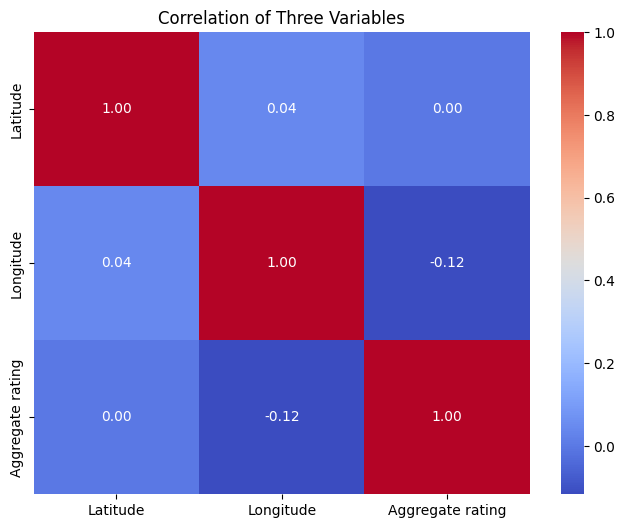

In [ ]:
# Step 4: Correlation Analysis
correlation = data[['Latitude', 'Longitude', 'Aggregate rating']].corr()
print("Correlation Matrix:\n\n ")
print(correlation,"\n\n\n")
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Three Variables')
plt.show()